In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [37]:
df1 = pd.read_csv("paypal.csv", encoding='utf-8', delimiter=",")

In [38]:
paypal = pd.DataFrame(df1, columns=['Data', ' Nome', ' Líquido'])

In [39]:
df2 = pd.read_excel('mercadopago.xls', sheet_name='0')

In [40]:
mercado_pago = pd.DataFrame(df2, columns=['Data de pagamento', 'Tipo de operação','Valor'])

In [41]:
df3 = pd.read_csv("caixa.txt", delimiter=";")

In [42]:
conta = pd.DataFrame(df3, columns=['Data_Mov','Historico', 'Valor','Deb_Cred'])

In [43]:
def format_data_paypal(data):
    return datetime.strptime(data, "%d-%m-%Y").strftime("%d/%m/%Y")

In [44]:
def format_data_mercadopago(data):
    return datetime.strptime(data, "%d/%m/%Y %H:%M").strftime("%d/%m/%Y")

In [45]:
def format_data_caixa(data):
    return datetime.strptime(str(data),"%Y%m%d").strftime("%d/%m/%Y")

In [46]:
paypal['Data'] = paypal['Data'].apply(format_data_paypal)

In [47]:
mercado_pago['Data de pagamento'] = mercado_pago['Data de pagamento'].apply(format_data_mercadopago)

In [48]:
conta['Data_Mov'] = conta['Data_Mov'].apply(format_data_caixa)

In [49]:
def format_valor_paypal(data):
    return float(data.replace(".","").replace(",","."))

In [50]:
paypal['valor'] =  paypal[' Líquido'].apply(format_valor_paypal)
paypal.drop(' Líquido', axis=1, inplace=True)

In [51]:
def format_valor_caixa(linha):
    if linha['Deb_Cred'] == 'D' and linha['Valor'] is not 0:
        return linha['Valor'] * -1
    else:
        return linha['Valor']

In [52]:
conta['Valor'] = conta.apply(format_valor_caixa, axis=1)

In [53]:
conta.drop('Deb_Cred',axis=1, inplace=True)

In [54]:
paypal["origem"] = "paypal"
mercado_pago["origem"] = "mercado pago"
conta["origem"] = "caixa"

In [55]:
paypal['valor'].sum() + mercado_pago['Valor'].sum() + conta['Valor'].sum()

431.12

In [56]:
paypal.rename(columns={' Nome': 'quem'}, inplace=True)
mercado_pago.rename(columns={'Data de pagamento': 'Data', 'Valor':'valor','Tipo de operação':'quem'}, inplace=True)
conta.rename(columns={'Data_Mov': 'Data', 'Valor':'valor','Historico':'quem'}, inplace=True)

In [57]:
frames = [paypal,mercado_pago,conta]

In [58]:
fechamento = pd.concat(frames)

In [59]:
def format_valor_export(data):
    return data.replace(".",",")

In [60]:
fechamento.valor = fechamento.valor.astype(str);
fechamento.valor = fechamento.valor.apply(format_valor_export)
fechamento = fechamento[['Data', 'quem', 'origem', 'valor']]


In [61]:
print(fechamento)

          Data                 quem        origem    valor
0   26/07/2018          DOADOR BLAH        paypal     47,0
1   26/07/2018          DOADOR BLAH        paypal    37,48
2   25/07/2018          DOADOR BLAH        paypal    94,61
3   25/07/2018          DOADOR BLAH        paypal    18,44
4   24/07/2018          DOADOR BLAH        paypal    94,61
5   23/07/2018          DOADOR BLAH        paypal    13,68
6   22/07/2018          DOADOR BLAH        paypal     47,0
7   22/07/2018          DOADOR BLAH        paypal     8,92
8   22/07/2018          DOADOR BLAH        paypal     47,0
9   22/07/2018          DOADOR BLAH        paypal     9,87
10  22/07/2018          DOADOR BLAH        paypal     47,0
11  22/07/2018          DOADOR BLAH        paypal     8,92
12  21/07/2018          DOADOR BLAH        paypal    94,61
13  20/07/2018          DOADOR BLAH        paypal     93,0
14  18/07/2018          DOADOR BLAH        paypal    94,61
15  14/07/2018          DOADOR BLAH        paypal    94,

In [62]:
fechamento.to_csv('out.csv')

In [63]:
def revert_formatting_valor(data):
    return data.replace(",", ".")

In [64]:
fechamento.valor = fechamento.valor.apply(revert_formatting_valor)
fechamento.valor = fechamento.valor.astype(float)

In [65]:
fechamento.groupby(['origem'])['valor'].sum()

origem
caixa           305.74
mercado pago   -150.00
paypal          275.38
Name: valor, dtype: float64

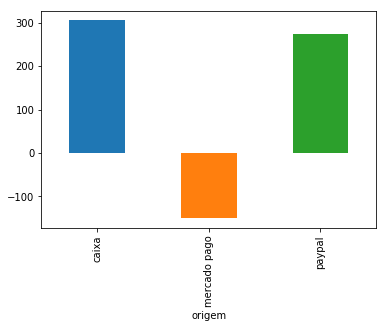

In [67]:
plt.figure();
fechamento.groupby(['origem'])['valor'].sum().plot(kind='bar');